# scope traces - network node MOT feedback with i2Vs
used with csv files produced from Rigol scopes

In [5]:
import matplotlib.pyplot as plt
from numpy import *
from scipy.optimize import curve_fit
import csv
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
datadir = os.path.join(os.getcwd(),'network_experiment\\')

In [25]:
datadir = os.path.join(os.getcwd(),'network_experiment\\')
print(datadir)
fname = 'network_exp_mot_i2v_feedback_MOT1-4_20240209.csv'
fpath = os.path.join(datadir,fname)
print(fpath)
try:
    with open(os.path.join(datadir,fname), 'r', newline='') as f:
        print("success")
except Exception as e:
    print(e)

C:\Users\prest\Documents\Python\rubidium\lab_analysis\network_experiment\
C:\Users\prest\Documents\Python\rubidium\lab_analysis\network_experiment\network_exp_mot_i2v_feedback_MOT1-4_20240209.csv
success


In [19]:
os.getcwd()

'C:\\Users\\prest\\Documents\\Python\\rubidium\\lab_analysis'

In [3]:
def process_csv(fname, newline='', cols=True, skiprows=1):
    rows = []
    with open(fname, 'r', newline=newline) as f:
        reader = csv.reader(f, delimiter=',')

        while skiprows > 0:
            reader.__next__()
            skiprows -= 1
        
        for row in reader:
            try:
                rows.append([float(x) for x in row if x != ''])
            except ValueError:
                print(f"row is problematic: \n {row}")

    if cols:
        return array(rows).T
    
    return rows

def norm_data(ypts, y0=0):
    """
    y0: if the 0 pt of the signal has a bias, set y0=bias
    """
    normed = ypts - y0
    normed /= max(normed)
    return normed

## 2024.02

In [26]:
# sample the file contents, get time increment
fpath = os.path.join(datadir,'network_exp_mot_i2v_feedback_MOT1-4_20240209.csv')
with open(fpath, 'r', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    for i,row in enumerate(reader):
        if i == 1:
            t_incr = float(row[2])        
        if i < 10:
            print(row)

['X', 'CH1', 'CH2', 'CH3', 'CH4', 'Start', 'Increment', '']


ValueError: could not convert string to float: 'Volt'

In [27]:
data = process_csv(fpath, skiprows=2)

In [29]:
row,ch1,ch2,ch3,ch4 = data

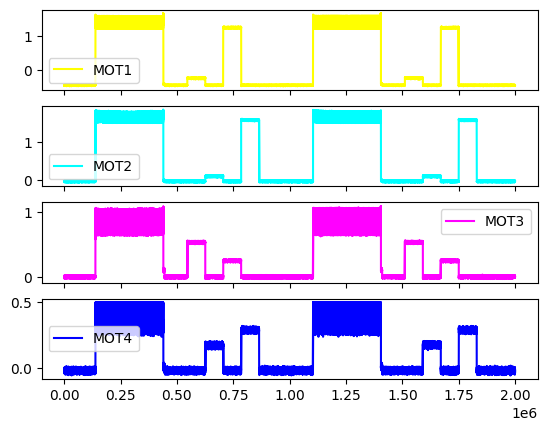

In [34]:
fig,axes = plt.subplots(nrows=4,sharex=True)
labels = ['MOT1','MOT2','MOT3','MOT4']
colors =['yellow','cyan','magenta','blue']
start_idx = int(1e6)
for ax,ch,clr,lbl in zip(axes.flat,data[1:],colors,labels):
    ax.plot(ch[start_idx:],color=clr,label=lbl)
    ax.legend()

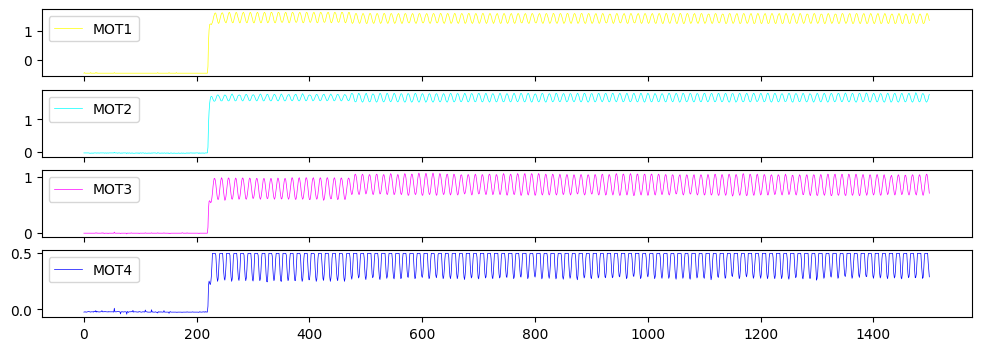

In [53]:
fig,axes = plt.subplots(nrows=4,sharex=True,figsize=(12,4))
labels = ['MOT1','MOT2','MOT3','MOT4']
colors =['yellow','cyan','magenta','blue']
start_idx = int(1.1385e6)
end_idx = int(1.14e6)
for ax,ch,clr,lbl in zip(axes.flat,data[1:],colors,labels):
    ax.plot(ch[start_idx:end_idx],color=clr,label=lbl,linewidth=0.5)
    ax.legend()

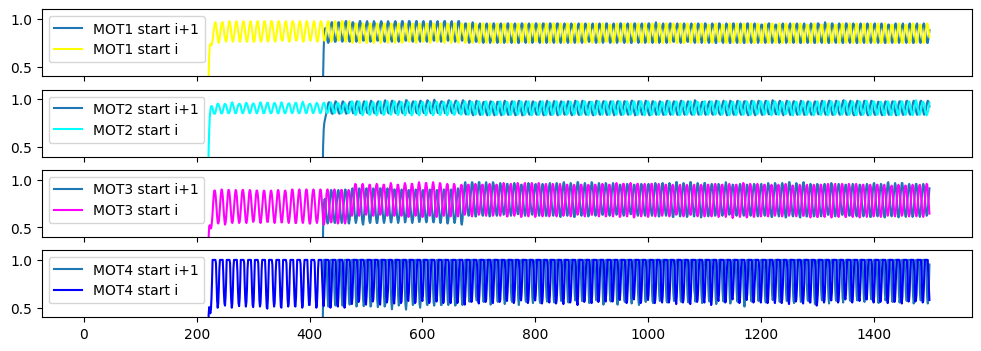

In [79]:
# split x-axis so we can view two parts side-by side?
fig,axes = plt.subplots(nrows=4,sharex=True,figsize=(12,4))
labels = ['MOT1','MOT2','MOT3','MOT4']
colors =['yellow','cyan','magenta','blue']
start_idx1 = int(1.1385e6)
end_idx1 = int(1.14e6)
start_idx2 = start_idx1 + int(9.65e5+5)
end_idx2 = start_idx2 + end_idx1 - start_idx1
for ax,ch,clr,lbl in zip(axes.flat,data[1:],colors,labels):
    norm = max(ch)
    ax.plot(ch[start_idx2:end_idx2]/norm,label=lbl+' start i+1')
    ax.plot(ch[start_idx1:end_idx1]/norm,color=clr,label=lbl+' start i')
    ax.set_ylim((0.4,1.1))
    ax.legend()

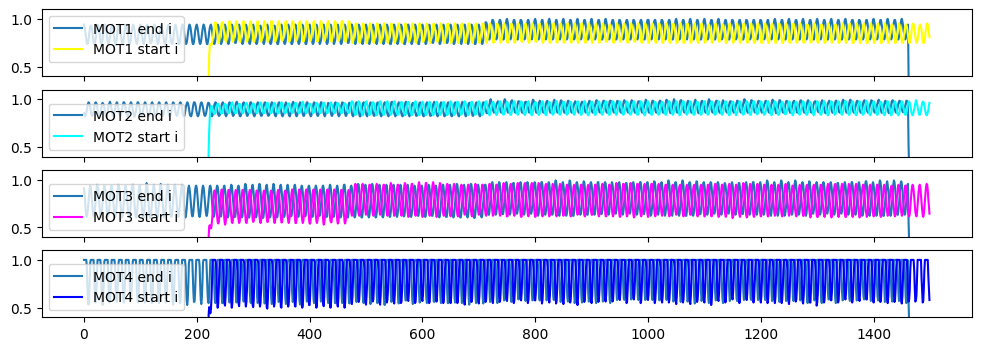

In [78]:
# split x-axis so we can view two parts side-by side?
fig,axes = plt.subplots(nrows=4,sharex=True,figsize=(12,4))
labels = ['MOT1','MOT2','MOT3','MOT4']
colors =['yellow','cyan','magenta','blue']
start_idx1 = int(1.1385e6)
end_idx1 = int(1.14e6)
start_idx2 = start_idx1 + int(3e5+5)
end_idx2 = start_idx2 + end_idx1 - start_idx1
for ax,ch,clr,lbl in zip(axes.flat,data[1:],colors,labels):
    norm = max(ch)
    ax.plot(ch[start_idx2:end_idx2]/norm,label=lbl+' end i')
    ax.plot(ch[start_idx1:end_idx1]/norm,color=clr,label=lbl+' start i')
    ax.set_ylim((0.4,1.1))
    ax.legend()

In [ ]:
# split x-axis so we can view two parts side-by side?
fig,axes = plt.subplots(nrows=4,sharex=True)
labels = ['MOT1','MOT2','MOT3','MOT4']
colors =['yellow','cyan','magenta','blue']
start_idx1 = int(1.1e6)
end_idx1 = int(1.5e6)
start_idx2 = int(2.05e6)
end_idx2 = int(2.5e6)
for ax,ch,clr,lbl in zip(axes.flat,data[1:],colors,labels):
    ax.plot(ch[start_idx1:end_idx1],color=clr,label=lbl)
    ax.plot(ch[start_idx2:end_idx2],label=lbl)
    ax.legend()

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w')

    # plot the same data on both axes
    ax.plot(x, y)
    ax2.plot(x, y)
    
    ax.set_xlim(0, 7.5)
    ax2.set_xlim(40, 42.5)
    
    # hide the spines between ax and ax2
    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax.yaxis.tick_left()
    ax.tick_params(labelright='off')
    ax2.yaxis.tick_right()
    
    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
    # (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.
    
    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((1-d, 1+d), (-d, +d), **kwargs)
    ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
    
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
    ax2.plot((-d, +d), (-d, +d), **kwargs)

In [ ]:
# split x-axis so we can view two parts side-by side?
fig,axes = plt.subplots(nrows=4,sharex=True)
labels = ['MOT1','MOT2','MOT3','MOT4']
colors =['yellow','cyan','magenta','blue']
start_idx1 = int(1.1e6)
end_idx1 = int(1.5e6)
start_idx2 = int(2.05e6)
end_idx2 = int(2.5e6)
for ax,ch,clr,lbl in zip(axes.flat,data[1:],colors,labels):
    ax.plot(ch[start_idx:],color=clr,label=lbl)
    ax.legend()

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w')

    # plot the same data on both axes
    ax.plot(x, y)
    ax2.plot(x, y)
    
    ax.set_xlim(0, 7.5)
    ax2.set_xlim(40, 42.5)
    
    # hide the spines between ax and ax2
    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax.yaxis.tick_left()
    ax.tick_params(labelright='off')
    ax2.yaxis.tick_right()
    
    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
    # (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.
    
    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((1-d, 1+d), (-d, +d), **kwargs)
    ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
    
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
    ax2.plot((-d, +d), (-d, +d), **kwargs)